In [58]:
np.random.seed(0)

# Cross-Validation

Cross validation is a way of evaluating a model on a dataset. It provides an estimation of the accuracy of the model if it were to make predictions on previously unseen data. Cross validation estimations are used to aid in the selection of a robust model that is fit for purpose.

How does it work?

* Test-train Split
* n-fold cross-validation

## From Scratch

### Straight-forward

In [40]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

### With 3-fold Validation

In [48]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
     # We use 'list' to copy, in order to 'pop' later on
     X_train = list(X_folds)
     X_test  = X_train.pop(k)
     X_train = np.concatenate(X_train)
     y_train = list(y_folds)
     y_test  = y_train.pop(k)
     y_train = np.concatenate(y_train)
     scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

print(scores)
print(np.array(scores).mean())
print(np.array(scores).std())

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]
0.943795214246
0.0092784262663


# Cross-Validation (Iris)

## Load Data and Libraries

In [2]:
# Cross Validation Classification
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

# load the iris datasets
dataset = datasets.load_iris() 

## Prepare Folds

In [3]:
# prepare cross validation folds
num_folds = 10
num_instances = len(dataset.data)

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds)

## Perform Modelling

In [4]:
# prepare a Logistic Regression model
model = LogisticRegression()

# evaluate the model k-fold cross validation
results = cross_validation.cross_val_score(model, dataset.data, dataset.target, cv=kfold)

## Summarize Results

In [5]:
# display the mean classification accuracy on each fold
print(results)

[ 1.          1.          1.          0.86666667  0.73333333  0.66666667
  1.          0.93333333  0.6         1.        ]


In [10]:
# display the mean and stdev of the classification accuracy
print(results.mean())
print(results.std()) 

0.88
0.148473716342


# Effect of Increasing Folds

In [37]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

def n_folds(dataset, n=2):
    num_folds = n
    num_instances = len(dataset.data)
    
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds)
    model = LogisticRegression()
    results = cross_validation.cross_val_score(model, dataset.data, dataset.target, cv=kfold)
    
    #print("n = ", n)
    #print("results = ", results)
    #print("mean = ", results.mean())
    #print("std = ", results.std())
    
    return((n, results.mean(), results.std()))

dataset = datasets.load_iris() 
n_folds(dataset)

(2, 0.30666666666666664, 0.026666666666666644)

In [38]:
def two_to_n_folds(dataset, n=2):
    out = [n_folds(dataset, n=x) for x in range(2,n)]
    return(out)

two_to_n_folds(dataset, n=20)

[(2, 0.30666666666666664, 0.026666666666666644),
 (3, 0.0, 0.0),
 (4, 0.62411095305832154, 0.32603764805051916),
 (5, 0.7533333333333333, 0.26212804335116663),
 (6, 0.71999999999999986, 0.22861904265976329),
 (7, 0.85157699443413726, 0.1490427177983096),
 (8, 0.84612573099415211, 0.17341016379228452),
 (9, 0.85988562091503262, 0.18627809307412366),
 (10, 0.87999999999999989, 0.14847371634213394),
 (11, 0.89360639360639349, 0.13330207554223947),
 (12, 0.90598290598290587, 0.12676361965379979),
 (13, 0.9067599067599067, 0.11413583377477941),
 (14, 0.92077922077922081, 0.13260751452850714),
 (15, 0.92000000000000004, 0.12220201853215575),
 (16, 0.92499999999999993, 0.11436216027910502),
 (17, 0.91993464052287588, 0.11507723438992817),
 (18, 0.91666666666666663, 0.13176156917368248),
 (19, 0.92763157894736847, 0.12378215606728143)]

# Tuning a parameter with Cross-Validation

In [55]:
import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores

[0.15552937214547155,
 0.15552937214547155,
 0.15552937214547155,
 0.15552937214547155,
 0.15552937214547155,
 0.90260270247335728,
 0.9482070815179453,
 0.94490714734074643,
 0.94379972762867548,
 0.94379972762867548]

In [59]:
np.logspace(-10, 0, 10)

array([  1.00000000e-10,   1.29154967e-09,   1.66810054e-08,
         2.15443469e-07,   2.78255940e-06,   3.59381366e-05,
         4.64158883e-04,   5.99484250e-03,   7.74263683e-02,
         1.00000000e+00])

In [61]:
b = 1./10.
a = 1./1000000.
n = 10
x = (b - a)/n

In [62]:
print( a, a+x, a+ 2*x, a+8*x, a+9*x, b)

1e-06 0.0100009 0.020000800000000003 0.08000020000000001 0.09000010000000001 0.1


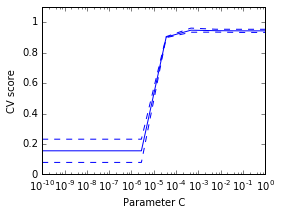

In [9]:
%matplotlib inline

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

## With more folds

[0.13526041386216708, 0.13526041386216708, 0.13526041386216708, 0.13526041386216708, 0.13857533098923888, 0.90655144643038454, 0.94885298468114831, 0.94938270421177484, 0.94933487262115257, 0.94933487262115257]


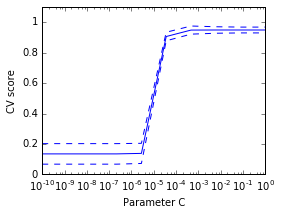

In [56]:
%matplotlib inline

import numpy as np
from sklearn import cross_validation, datasets, svm
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, cv=5, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

print(scores)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

We just tuned a hyper-parameter! This can be done more easily.